# Naive Bayes
### Collected by: Mehdi Ghane
#### Date: May 2020
#### Credit: 
* Udacity machine Learning Nano-degree
* Udemy Data Science Bootcamp
* DataQuest Data Science Pathway

## Overview
Assuming the events are independent so P(A and B)=P(A) * P(B) is the heart assumption for Naive Bayes Technique. Posterior probabilities calculated are usually proportional, not equal, to the actual probabilities. In order to approach toward an actual probability Bayes normalized the results.

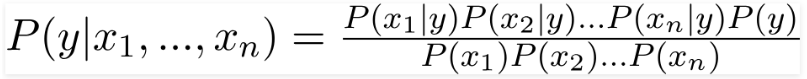

This project has been broken down in to the following steps: 

- Step 0: Introduction to the Naive Bayes Theorem
- Step 1.1: Understanding our dataset
- Step 1.2: Data Preprocessing
- Step 2.1: Bag of Words (BoW)
- Step 2.2: Implementing BoW from scratch
- Step 2.3: Implementing Bag of Words in scikit-learn
- Step 3.1: Training and testing sets
- Step 3.2: Applying Bag of Words processing to our dataset.
- Step 4.1: Bayes Theorem implementation from scratch
- Step 4.2: Naive Bayes implementation from scratch
- Step 5: Naive Bayes implementation using scikit-learn
- Step 6: Evaluating our model
- Step 7: Conclusion

## Our Mission ##

Spam detection is one of the major applications of Machine Learning in the interwebs today. Pretty much all of the major email service providers have spam detection systems built in and automatically classify such mail as 'Junk Mail'. 

In this mission we will be using the Naive Bayes algorithm to create a model that can classify SMS messages as spam or not spam, based on the training we give to the model. It is important to have some level of intuition as to what a spammy text message might look like. Often they have words like 'free', 'win', 'winner', 'cash', 'prize' and the like in them as these texts are designed to catch your eye and in some sense tempt you to open them. Also, spam messages tend to have words written in all capitals and also tend to use a lot of exclamation marks. To the human recipient, it is usually pretty straightforward to identify a spam text and our objective here is to train a model to do that for us!

Being able to identify spam messages is a binary classification problem as messages are classified as either 'Spam' or 'Not Spam' and nothing else. Also, this is a supervised learning problem, as we will be feeding a labelled dataset into the model, that it can learn from, to make future predictions. 

### Step 0: Introduction to the Naive Bayes Theorem ###

Bayes Theorem is one of the earliest probabilistic inference algorithms. It was developed by Reverend Bayes (which he used to try and infer the existence of God no less), and still performs extremely well for certain use cases. 

One thing to consider is the independence of these features amongst each other. 

This is the 'Naive' bit of the theorem where it considers each feature to be independent of each other which may not always be the case and hence that can affect the final judgement.

In short, Bayes Theorem calculates the probability of a certain event happening (in our case, a message being spam) based on the joint probabilistic distributions of certain other events (in our case, the appearance of certain words in a message). 

### Step 1.1: Understanding our dataset ### 


We will be using a dataset originally compiled and posted on the UCI Machine Learning repository which has a very good collection of datasets for experimental research purposes. You can review the [abstract](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) and the original [compressed data file](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/) on the UCI site. 

The first column takes two values, 'ham' which signifies that the message is not spam, and 'spam' which signifies that the message is spam. 

The second column is the text content of the SMS message that is being classified.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# '!' allows you to run bash commands from jupyter notebook.

# The required data table can be found under smsspamcollection/SMSSpamCollection
print("\n List all the files inside the smsspamcollection directory\n")
!ls smsspamcollection


 List all the files inside the smsspamcollection directory

SMSSpamCollection
readme


In [6]:
import pandas as pd
# read delimited file into dataframe
df = pd.read_table(filepath_or_buffer='./smsspamcollection/SMSSpamCollection',
                     delimiter='\t',header=None,
                    names=['label','message'])

# Output printing out first 5 rows
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 1.2: Data Preprocessing ###

Now that we have a basic understanding of what our dataset looks like, let's convert our labels to binary variables, 0 to represent 'ham'(i.e. not spam) and 1 to represent 'spam' for ease of computation. 

Scikit-learn only deals with numerical values and hence if we were to leave our label values as strings, scikit-learn would do the conversion internally(more specifically, the string labels will be cast to unknown float values), and we could have issues later when calculating performance metrics, for example when calculating our precision and recall scores. 

In [7]:
'''
Solution
'''
df['label'] = df['label'].map(dict(ham=0,spam=1))
print(df.shape)
df.head()

(5572, 2)


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Step 2.1: Bag of Words ###

The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter. 

Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word (token) being the column, and the corresponding (row, column) values being the frequency of occurrence of each word or token in that document.

For example: 

Let's say we have 4 documents, which are text messages
in our case, as follows:

`['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']`

Our objective here is to convert this set of texts to a frequency distribution matrix as below:

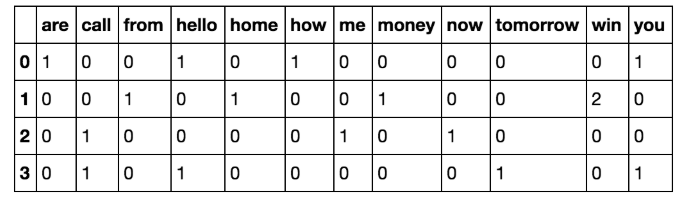


Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Let's break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearn's 
[count vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) method which does the following:

* It tokenizes the string (separates the string into individual words) and gives an integer ID to each token.
* It counts the occurrence of each of those tokens.

**Please Note:** 

* The CountVectorizer method automatically converts all tokenized words to their lower case form so that it does not treat words like 'He' and 'he' differently. It does this using the `lowercase` parameter which is by default set to `True`.

* It also ignores all punctuation so that words followed by a punctuation mark (for example: 'hello!') are not treated differently than the same words not prefixed or suffixed by a punctuation mark (for example: 'hello'). It does this using the `token_pattern` parameter which has a default regular expression which selects tokens of 2 or more alphanumeric characters.

* The third parameter to take note of is the `stop_words` parameter. Stop words refer to the most commonly used words in a language. They include words like 'am', 'an', 'and', 'the', etc. By setting this parameter value to `english`, CountVectorizer will automatically ignore all words (from our input text) that are found in the built in list of English stop words in scikit-learn. This is extremely helpful as stop words can skew our calculations when we are trying to find certain key words that are indicative of spam.

We will dive into the application of each of these into our model in a later step, but for now it is important to be aware of such preprocessing techniques available to us when dealing with textual data.

### Step 2.2: Implementing Bag of Words from scratch ###

Before we dive into scikit-learn's Bag of Words (BoW) library to do the dirty work for us, let's implement it ourselves first so that we can understand what's happening behind the scenes. 

**Step 1: Convert all strings to their lower case form.**

Let's say we have a document set:

```
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']
```

In [5]:
'''
Solution:
'''
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
for i in documents:
    lower_case_documents.append(i.lower())
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


**Step 2: Removing all punctuation**

In [6]:
'''
Solution:
'''
sans_punctuation_documents = []
import string
table = str.maketrans("","",string.punctuation)
for i in lower_case_documents:
   sans_punctuation_documents.append(i.translate(table))
    
print(sans_punctuation_documents)

['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


**Hint**
We can use str.strip in place of str.translate but strip removes punctuations only from beginning and end of string not those in the middle. Following code shows the difference.

In [9]:
# lets work with our actual dataset
text = df['message'].apply(lambda x: x.lower().split())
text.shape

(5572,)

In [10]:
# method 1
import string
bow=[]
for i in text:
    for j in i:
        if not j.strip(string.punctuation) in bow:
            bow.append(j.strip(string.punctuation))  

In [11]:
# this method will only remove punctuations from beginning and end of each string
bow.index("mei's")

9760

In [14]:
# method 2
table = str.maketrans("","",string.punctuation)
bow=[]
for i in text:
    for j in i:
        if not j.translate(table) in bow:
            bow.append(j.translate(table))  

In [15]:
# this last method will remove all punctuations from all over each string
bow.index("meis")

9608

**Step 3: Tokenization**

Tokenizing a sentence in a document set means splitting up the sentence into individual words using a delimiter. The delimiter specifies what character we will use to identify the beginning and  end of a word. Most commonly, we use a single space as the delimiter character for identifying words, and this is true in our documents in this case also.

In [7]:
'''
Solution:
'''
preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split())
print(preprocessed_documents)

[['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


**Step 4: Count frequencies**

Now that we have our document set in the required format, we can proceed to counting the occurrence of each word in each document of the document set. We will use the `Counter` method from the Python `collections` library for this purpose. 

`Counter` counts the occurrence of each item in the list and returns a dictionary with the key as the item being counted and the corresponding value being the count of that item in the list. 

In [8]:
'''
Solution
'''
frequency_list = []
import pprint
from collections import Counter

for i in preprocessed_documents:
    frequency_list.append(Counter(i))
    
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


That was for us to get a solid understanding of what is happening behind the scenes in the `sklearn.feature_extraction.text.CountVectorizer` method of scikit-learn. 

We will now implement `sklearn.feature_extraction.text.CountVectorizer` method in the next step.

### Step 2.3: Implementing Bag of Words in scikit-learn ###


In [ ]:
'''
Here we will look to create a frequency matrix on a smaller document set to make sure we understand how the 
document-term matrix generation happens. We have created a sample document set 'documents'.
'''
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']

In [9]:
'''
Solution
'''
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

**Data preprocessing with CountVectorizer()**

In Step 2.2, we implemented a version of the CountVectorizer() method from scratch that entailed cleaning our data first. This cleaning involved converting all of our data to lower case and removing all punctuation marks. CountVectorizer() has certain parameters which take care of these steps for us. They are:

* `lowercase = True`
    
    The `lowercase` parameter has a default value of `True` which converts all of our text to its lower case form.


* `token_pattern = (?u)\\b\\w\\w+\\b`
    
    The `token_pattern` parameter has a default regular expression value of `(?u)\\b\\w\\w+\\b` which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.


* `stop_words`

    The `stop_words` parameter, if set to `english` will remove all words from our document set that match a list of English stop words defined in scikit-learn. Considering the small size of our dataset and the fact that we are dealing with SMS messages and not larger text sources like e-mail, we will not use stop words, and we won't be setting this parameter value.

Let us take a look at all the parameter values of your `count_vector` object by simply printing out the object as follows:

In [10]:
'''
Practice node:
Print the 'count_vector' object which is an instance of 'CountVectorizer()'
'''
# No need to revise this code
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [11]:
# Fit documents dataset to the vector object
'''
Solution:
'''
# No need to revise this code
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

The `get_feature_names()` method returns our feature names for this dataset, which is the set of words that make up our vocabulary for 'documents'.

In [17]:
# Creating a matrix with each row representing one of the 4 documents,
# and each column representing a word (feature name). Each value in the matrix will represent the frequency of the word in that column occurring in the particular document in that row.
'''
Solution
'''
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

Now we have a clean representation of the documents in terms of the frequency distribution of the words in them. To make it easier to understand our next step is to convert this array into a dataframe and name the columns appropriately.

In [18]:
'''
Solution
'''
frequency_matrix = pd.DataFrame(data=doc_array, columns=count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


One potential issue that can arise from using this method is that if our dataset of text is extremely large (say if we have a large collection of news articles or email data), there will be certain values that are more common than others simply due to the structure of the language itself. For example, words like 'is', 'the', 'an', pronouns, grammatical constructs, etc., could skew our matrix and affect our analyis. 

There are a couple of ways to mitigate this. One way is to use the `stop_words` parameter and set its value to `english`. This will automatically ignore all the words in our input text that are found in a built-in list of English stop words in scikit-learn.

Another way of mitigating this is by using the [tfidf](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) method. 

### Step 3.1: Training and testing sets ###

Now that we understand how to use the Bag of Words approach, we can return to our original, larger UCI dataset and proceed with our analysis. Our first step is to split our dataset into a training set and a testing set so we can first train, and then test our model. 

In [3]:
'''
Solution 
'''
# split into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


### Step 3.2: Applying Bag of Words processing to our dataset. ###

Now that we have split the data, our next objective is to follow the steps from "Step 2: Bag of Words," and convert our data into the desired matrix format. To do this we will be using CountVectorizer() as we did before. There are two  steps to consider here:

* First, we have to fit our training data (`X_train`) into `CountVectorizer()` and return the matrix.
* Secondly, we have to transform our testing data (`X_test`) to return the matrix. 

Note that `X_train` is our training data for the 'message' column in our dataset and we will be using this to train our model. 

`X_test` is our testing data for the 'message' column and this is the data we will be using (after transformation to a matrix) to make predictions on. We will then compare those predictions with `y_test` in a later step. 

In [ ]:
'''
[Practice Node]

The code for this segment is in 2 parts. First, we are learning a vocabulary dictionary for the training data 
and then transforming the data into a document-term matrix; secondly, for the testing data we are only 
transforming the data into a document-term matrix.

This is similar to the process we followed in Step 2.3.

We will provide the transformed data to students in the variables 'training_data' and 'testing_data'.
'''

In [6]:
'''
Solution
'''
# Instantiate the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

### Step 4.1: Bayes Theorem implementation from scratch ###

Now that we have our dataset in the format that we need, we can move onto the next portion of our mission which is the  algorithm we will use to make our predictions to classify a message as spam or not spam. Remember that at the start of the mission we briefly discussed the Bayes theorem but now we shall go into a little more detail. In layman's terms, the Bayes theorem calculates the probability of an event occurring, based on certain other probabilities that are related to the event in question. It is composed of "prior probabilities" - or just "priors." These "priors" are the probabilities that we are aware of, or that are given to us. And Bayes theorem is also composed of the "posterior probabilities," or just "posteriors," which are the probabilities we are looking to compute using the "priors". 

Let us implement the Bayes Theorem from scratch using a simple example. Let's say we are trying to find the odds of an individual having diabetes, given that he or she was tested for it and got a positive result. 
In the medical field, such probabilities play a very important role as they often deal with life and death situations. 

We assume the following:

`P(D)` is the probability of a person having Diabetes. Its value is `0.01`, or in other words, 1% of the general population has diabetes (disclaimer: these values are assumptions and are not reflective of any actual medical study).

`P(Pos)` is the probability of getting a positive test result.

`P(Neg)` is the probability of getting a negative test result.

`P(Pos|D)` is the probability of getting a positive result on a test done for detecting diabetes, given that you have diabetes. This has a value `0.9`. In other words the test is correct 90% of the time. This is also called the Sensitivity or True Positive Rate.

`P(Neg|~D)` is the probability of getting a negative result on a test done for detecting diabetes, given that you do not have diabetes. This also has a value of `0.9` and is therefore correct, 90% of the time. This is also called the Specificity or True Negative Rate.

The Bayes formula is as follows:


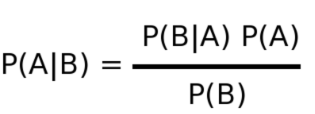

* `P(A)` is the prior probability of A occurring independently. In our example this is `P(D)`. This value is given to us.

* `P(B)` is the prior probability of B occurring independently. In our example this is `P(Pos)`.

* `P(A|B)` is the posterior probability that A occurs given B. In our example this is `P(D|Pos)`. That is, **the probability of an individual having diabetes, given that this individual got a positive test result. This is the value that we are looking to calculate.**

* `P(B|A)` is the prior probability of B occurring, given A. In our example this is `P(Pos|D)`. This value is given to us.

Putting our values into the formula for Bayes theorem we get:

`P(D|Pos) = P(D) * P(Pos|D) / P(Pos)`

The probability of getting a positive test result `P(Pos)` can be calculated using the Sensitivity and Specificity as follows:

`P(Pos) = [P(D) * Sensitivity] + [P(~D) * (1-Specificity))]`

In [ ]:
'''
Instructions:
Calculate probability of getting a positive test result, P(Pos)
'''

In [30]:
'''
Solution (skeleton code will be provided)
'''
# P(D)
p_diabetes = 0.01

# P(~D)
p_no_diabetes = 0.99

# Sensitivity or P(Pos|D)
p_pos_diabetes = 0.9

# Specificity or P(Neg|~D)
p_neg_no_diabetes = 0.9

# P(Pos)
p_pos = p_diabetes*p_pos_diabetes + p_no_diabetes*(1-p_neg_no_diabetes)
print('The probability of getting a positive test result P(Pos) is: {}',format(p_pos))

The probability of getting a positive test result P(Pos) is: {} 0.10799999999999998


**Using all of this information we can calculate our posteriors as follows:**
    
The probability of an individual having diabetes, given that, that individual got a positive test result:

`P(D|Pos) = (P(D) * Sensitivity)) / P(Pos)`

The probability of an individual not having diabetes, given that, that individual got a positive test result:

`P(~D|Pos) = (P(~D) * (1-Specificity)) / P(Pos)`

The sum of our posteriors will always equal `1`. 

In [ ]:
'''
Instructions:
Compute the probability of an individual having diabetes, given that, that individual got a positive test result.
In other words, compute P(D|Pos).

The formula is: P(D|Pos) = (P(D) * P(Pos|D) / P(Pos)
'''

In [31]:
'''
Solution
'''
# P(D|Pos)
p_diabetes_pos = p_diabetes*p_pos_diabetes/p_pos
print('Probability of an individual having diabetes, given that that individual got a positive test result is:\
',format(p_diabetes_pos)) 

Probability of an individual having diabetes, given that that individual got a positive test result is: 0.08333333333333336


In [ ]:
'''
Instructions:
Compute the probability of an individual not having diabetes, given that, that individual got a positive test result.
In other words, compute P(~D|Pos).

The formula is: P(~D|Pos) = P(~D) * P(Pos|~D) / P(Pos)

Note that P(Pos|~D) can be computed as 1 - P(Neg|~D). 

Therefore:
P(Pos|~D) = p_pos_no_diabetes = 1 - 0.9 = 0.1
'''

In [38]:
'''
Solution
'''
# P(Pos|~D)
p_pos_no_diabetes = 0.1

# P(~D|Pos)
p_no_diabetes_pos = p_pos_no_diabetes*p_no_diabetes/p_pos
print ('Probability of an individual not having diabetes, given that that individual got a positive test result is:',p_no_diabetes_pos)

Probability of an individual not having diabetes, given that that individual got a positive test result is: 0.9166666666666669


The analysis shows that even if you get a positive test result, there is only an 8.3% chance that you actually have diabetes and a 91.67% chance that you do not have diabetes. This is of course assuming that only 1% of the entire population has diabetes which is only an assumption.

**What does the term 'Naive' in 'Naive Bayes' mean ?** 

The term 'Naive' in Naive Bayes comes from the fact that the algorithm considers the features that it is using to make the predictions to be independent of each other, which may not always be the case. So in our Diabetes example, we are considering only one feature, that is the test result. Say we added another feature, 'exercise'. If we had to use both of these features, namely the test result and the value of the 'exercise' feature, to compute our final probabilities, Bayes' theorem would fail. Naive Bayes' is an extension of Bayes' theorem that assumes that all the features are independent of each other. 

### Step 4.2: Naive Bayes implementation from scratch ###



Now that you have understood the ins and outs of Bayes Theorem, we will extend it to consider cases where we have more than one feature. 

Let's say that we have two political parties' candidates, 'Jill Stein' of the Green Party and 'Gary Johnson' of the Libertarian Party and we have the probabilities of each of these candidates saying the words 'freedom', 'immigration' and 'environment' when they give a speech:

* Probability that Jill Stein says 'freedom': 0.1 ---------> `P(F|J)`
* Probability that Jill Stein says 'immigration': 0.1 -----> `P(I|J)`
* Probability that Jill Stein says 'environment': 0.8 -----> `P(E|J)`


* Probability that Gary Johnson says 'freedom': 0.7 -------> `P(F|G)`
* Probability that Gary Johnson says 'immigration': 0.2 ---> `P(I|G)`
* Probability that Gary Johnson says 'environment': 0.1 ---> `P(E|G)`


And let us also assume that the probability of Jill Stein giving a speech, `P(J)` is `0.5` and the same for Gary Johnson, `P(G) = 0.5`. 


Given this, what if we had to find the probabilities of Jill Stein saying the words 'freedom' and 'immigration'? This is where the Naive Bayes' theorem comes into play as we are considering two features, 'freedom' and 'immigration'.

Now we are at a place where we can define the formula for the Naive Bayes' theorem:

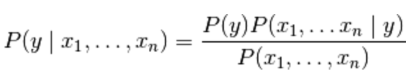

Here, `y` is the class variable (in our case the name of the candidate) and `x1` through `xn` are the feature vectors (in our case the individual words). The theorem makes the assumption that each of the feature vectors or words (`xi`) are independent of each other.

To break this down, we have to compute the following posterior probabilities:

* `P(J|F,I)`: Given the words 'freedom' and 'immigration' were said, what's the probability they were said by Jill?

    Using the formula and our knowledge of Bayes' theorem, we can compute this as follows: `P(J|F,I)` = `(P(J) * P(F|J) * P(I|J)) / P(F,I)`. Here `P(F,I)` is the probability of the words 'freedom' and 'immigration' being said in a speech.
    

* `P(G|F,I)`: Given the words 'freedom' and 'immigration' were said, what's the probability they were said by Gary?
    
    Using the formula, we can compute this as follows: `P(G|F,I)` = `(P(G) * P(F|G) * P(I|G)) / P(F,I)`

In [ ]:
'''
Instructions: Compute the probability of the words 'freedom' and 'immigration' being said in a speech, or
P(F,I).

The first step is multiplying the probabilities of Jill Stein giving a speech with her individual 
probabilities of saying the words 'freedom' and 'immigration'. Store this in a variable called p_j_text.

The second step is multiplying the probabilities of Gary Johnson giving a speech with his individual 
probabilities of saying the words 'freedom' and 'immigration'. Store this in a variable called p_g_text.

The third step is to add both of these probabilities and you will get P(F,I).
'''

In [39]:
'''
Solution: Step 1
'''
# P(J)
p_j = 0.5

# P(F/J)
p_j_f = 0.1

# P(I/J)
p_j_i = 0.1

p_j_text = p_j*p_j_f*p_j_i
print(p_j_text)

0.005000000000000001


In [40]:
'''
Solution: Step 2
'''
# P(G)
p_g = 0.5

# P(F/G)
p_g_f = 0.7

# P(I/G)
p_g_i = 0.2

p_g_text =p_g*p_g_f*p_g_i 
print(p_g_text)

0.06999999999999999


In [41]:
'''
Solution: Step 3: Compute P(F,I) and store in p_f_i
'''
p_f_i = p_g_text + p_j_text
print('Probability of words freedom and immigration being said are: ', format(p_f_i))

Probability of words freedom and immigration being said are:  0.075


Now we can compute the probability of `P(J|F,I)`, the probability of Jill Stein saying the words 'freedom' and 'immigration' and `P(G|F,I)`, the probability of Gary Johnson saying the words 'freedom' and 'immigration'.

In [ ]:
'''
Instructions:
Compute P(J|F,I) using the formula P(J|F,I) = (P(J) * P(F|J) * P(I|J)) / P(F,I) and store it in a variable p_j_fi
'''

In [42]:
'''
Solution
'''
p_j_fi = p_j_text/p_f_i
print('The probability of Jill Stein saying the words Freedom and Immigration: ', format(p_j_fi))

The probability of Jill Stein saying the words Freedom and Immigration:  0.06666666666666668


In [ ]:
'''
Instructions:
Compute P(G|F,I) using the formula P(G|F,I) = (P(G) * P(F|G) * P(I|G)) / P(F,I) and store it in a variable p_g_fi
'''

In [43]:
'''
Solution
'''
p_g_fi = p_g_text/p_f_i
print('The probability of Gary Johnson saying the words Freedom and Immigration: ', format(p_g_fi))

The probability of Gary Johnson saying the words Freedom and Immigration:  0.9333333333333332


And as we can see, just like in the Bayes' theorem case, the sum of our posteriors is equal to 1. 

Our analysis shows that there is only a 6.6% chance that Jill Stein of the Green Party uses the words 'freedom' and 'immigration' in her speech as compared with the 93.3% chance for Gary Johnson of the Libertarian party.

For another example of Naive Bayes, let's consider searching for images using the term 'Sacramento Kings' in a search engine. In order for us to get the results pertaining to the Scramento Kings NBA basketball team, the search engine needs to be able to associate the two words together and not treat them individually. If the search engine only searched for the words individually, we would get results of images tagged with 'Sacramento,' like pictures of city landscapes, and images of 'Kings,' which might be pictures of crowns or kings from history. But associating the two terms together would produce images of the basketball team. In the first approach we would treat the words as independent entities, so it would be considered 'naive.' We don't usually want this approach from a search engine, but it can be extremely useful in other cases. 


Applying this to our problem of classifying messages as spam, the Naive Bayes algorithm *looks at each word individually and not as associated entities* with any kind of link between them. In the case of spam detectors, this usually works, as there are certain red flag words in an email which are highly reliable in classifying it as spam. For example, emails with words like 'viagra' are usually classified as spam.

### Step 5: Naive Bayes implementation using scikit-learn ###

Now let's return to our spam classification context. Thankfully, sklearn has several Naive Bayes implementations that we can use, so we do not have to do the math from scratch. We will be using sklearn's `sklearn.naive_bayes` method to make predictions on our SMS messages dataset. 

Specifically, we will be using the multinomial Naive Bayes algorithm. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. On the other hand, Gaussian Naive Bayes is better suited for continuous data as it assumes that the input data has a Gaussian (normal) distribution.

In [ ]:
'''
Instructions:

We have loaded the training data into the variable 'training_data' and the testing data into the 
variable 'testing_data'.

Import the MultinomialNB classifier and fit the training data into the classifier using fit(). Name your classifier
'naive_bayes'. You will be training the classifier using 'training_data' and 'y_train' from our split earlier. 
'''

In [8]:
'''
Solution
'''
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
'''
Instructions:
Now that our algorithm has been trained using the training data set we can now make some predictions on the test data
stored in 'testing_data' using predict(). Save your predictions into the 'predictions' variable.
'''

In [9]:
'''
Solution
'''
predictions = naive_bayes.predict(testing_data)

Now that predictions have been made on our test set, we need to check the accuracy of our predictions.

### Step 6: Evaluating our model ###

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, so first let's review them.

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives (words classified as spam, and which actually are spam) to all positives (all words classified as spam, regardless of whether that was the correct classification). In other words, precision is the ratio of

`[True Positives/(True Positives + False Positives)]`

**Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives (words classified as spam, and which actually are spam) to all the words that were actually spam. In other words, recall is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case - for example if we had 100 text messages and only 2 were spam and the other 98 weren't - accuracy by itself is not a very good metric. We could classify 90 messages as not spam (including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam (all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the **F1 score**, which is the weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

We will be using all 4 of these metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a score as close to 1 as possible is a good indicator of how well our model is doing.

In [ ]:
'''
Instructions:
Compute the accuracy, precision, recall and F1 scores of your model using your test data 'y_test' and the predictions
you made earlier stored in the 'predictions' variable.
'''

In [15]:
'''
Solution
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('Precision score: ', format(precision_score(y_test,predictions)))
print('Recall score: ', format(recall_score(y_test,predictions)))
print('F1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


### Step 7: Conclusion ###

One of the major advantages that Naive Bayes has over other classification algorithms is **its ability to handle an extremely large number of features.** In our case, each word is treated as a feature and there are thousands of different words. **Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them. The other major advantage it has is its relative simplicity.** Naive Bayes' works well right out of the box and tuning its parameters is rarely ever necessary, except usually in cases where the distribution of the data is known. 
**It rarely ever overfits the data. Another important advantage is that its model training and prediction times are very fast for the amount of data it can handle.** All in all, Naive Bayes' really is a gem of an algorithm!

## End of Document